In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
bikes = pd.read_csv('C:/Users/Desktop/Bikes project/hour.csv')

# Preproccessing the data

In [4]:
bikes.head(5)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bikes1 = bikes.copy()

In [7]:
bikes1.isnull().sum()

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

In [8]:
bikes1.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
bikes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
#removing unnecessary columns
bikes1 = bikes1.drop(['index','date','casual','registered'], axis = 1)
bikes1

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


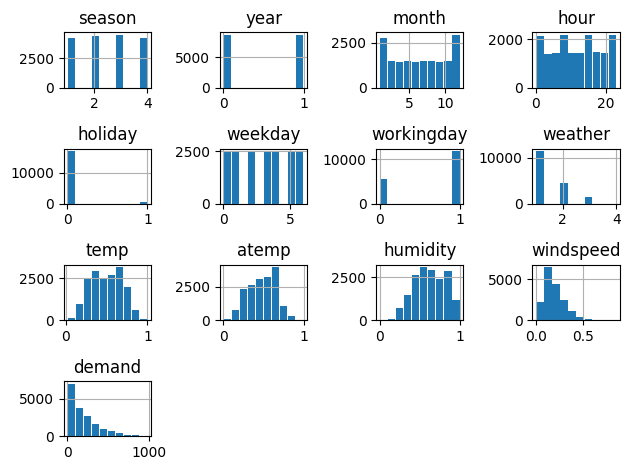

In [12]:
#understand the distribution of the dataset
bikes1.hist(rwidth = 0.9)
plt.tight_layout()

# Data Visualisation

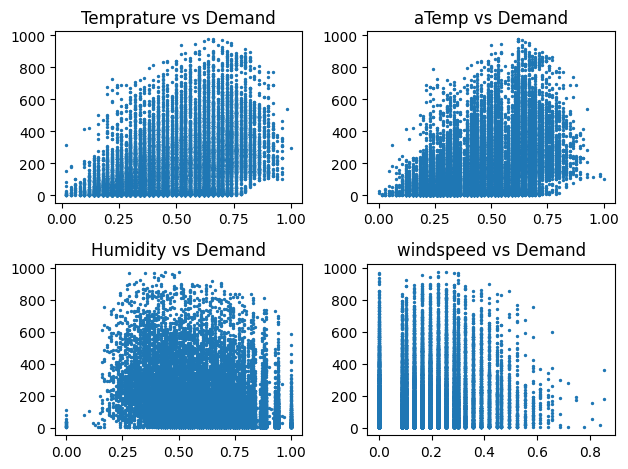

In [25]:
plt.subplot(2, 2, 1)
plt.title("Temprature vs Demand")
plt.scatter(bikes1["temp"], bikes1["demand"], s=2)

plt.subplot(2, 2, 2)
plt.title("aTemp vs Demand")
plt.scatter(bikes1["atemp"], bikes1["demand"], s=2)

plt.subplot(2, 2, 3)
plt.title("Humidity vs Demand")
plt.scatter(bikes1["humidity"], bikes1["demand"], s=2)

plt.subplot(2, 2, 4)
plt.title("windspeed vs Demand")
plt.scatter(bikes1["windspeed"], bikes1["demand"], s=2)
plt.tight_layout()

In [28]:
cat_list

array([1, 2, 3, 4], dtype=int64)

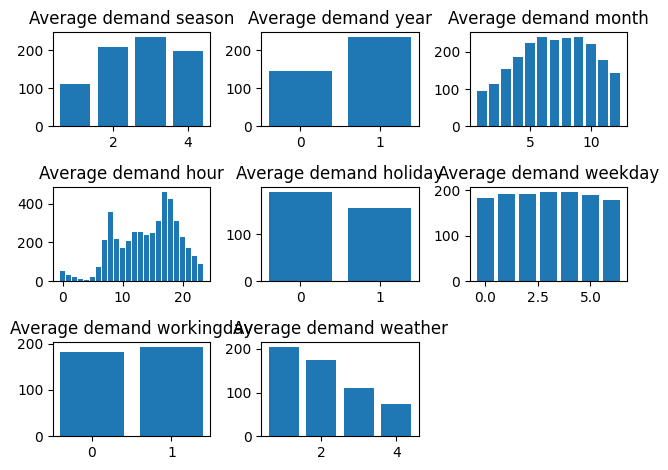

In [49]:
plt.subplot(3, 3, 1)
plt.title("Average demand season")
cat_list = bikes1["season"].unique()
cat_avg = bikes1.groupby('season').mean()["demand"]
plt.bar(cat_list, cat_avg)

plt.subplot(3, 3, 2)
plt.title("Average demand year")
cat_list = bikes1["year"].unique()
cat_avg = bikes1.groupby('year').mean()["demand"]
plt.bar(cat_list, cat_avg)

plt.subplot(3, 3, 3)
plt.title("Average demand month")
cat_list = bikes1["month"].unique()
cat_avg = bikes1.groupby('month').mean()["demand"]
plt.bar(cat_list, cat_avg)

plt.subplot(3, 3, 4)
plt.title("Average demand hour")
cat_list = bikes1["hour"].unique()
cat_avg = bikes1.groupby('hour').mean()["demand"]
plt.bar(cat_list, cat_avg)

plt.subplot(3, 3, 5)
plt.title("Average demand holiday")
cat_list = bikes1["holiday"].unique()
cat_avg = bikes1.groupby('holiday').mean()["demand"]
plt.bar(cat_list, cat_avg)

plt.subplot(3, 3, 6)
plt.title("Average demand weekday")
cat_list = bikes1["weekday"].unique()
cat_avg = bikes1.groupby('weekday').mean()["demand"]
plt.bar(cat_list, cat_avg)

plt.subplot(3, 3, 7)
plt.title("Average demand workingday")
cat_list = bikes1["workingday"].unique()
cat_avg = bikes1.groupby('workingday').mean()["demand"]
plt.bar(cat_list, cat_avg)

plt.subplot(3, 3, 8)
plt.title("Average demand weather")
cat_list = bikes1["weather"].unique()
cat_avg = bikes1.groupby('weather').mean()["demand"]
plt.bar(cat_list, cat_avg)

plt.tight_layout()

<BarContainer object of 24 artists>

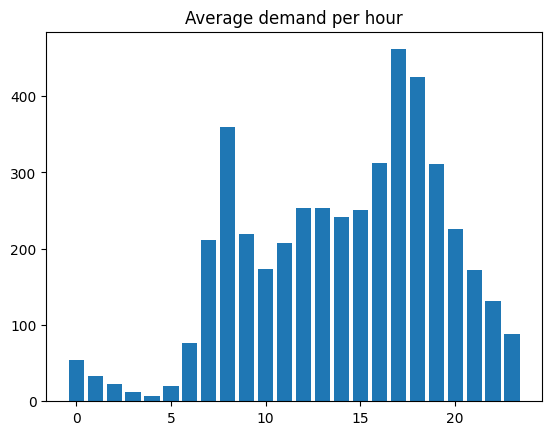

In [42]:
plt.title("Average demand per hour")
cat_list = bikes1["hour"].unique()
cat_avg = bikes1.groupby('hour').mean()["demand"]
plt.bar(cat_list, cat_avg)

In [47]:
#check outliers
bikes1["demand"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [53]:
bikes1["demand"].quantile([0.25,0.50,0.75])

0.25     40.0
0.50    142.0
0.75    281.0
Name: demand, dtype: float64

In [54]:
correl = bikes1[['temp','atemp','humidity','windspeed','demand']].corr()

In [55]:
correl

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [56]:
bikes1 = bikes1.drop(['weekday','year','workingday','atemp','windspeed'], axis = 1)

In [57]:
bikes1.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474893, 0.4704974 , 0.49623   , 0.49404252, 0.46796116,
        0.47732234, 0.52675974, 0.5914597 , 0.6520183 , 0.71519834,
        0.8059134 , 0.9253132 , 1.        , 0.9253132 , 0.8059134 ,
        0.71519834, 0.6520183 , 0.5914597 , 0.52675974, 0.47732234,
        0.46796116, 0.49404252, 0.49623   , 0.4704974 , 0.45474893],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x235a25ed1d0>)

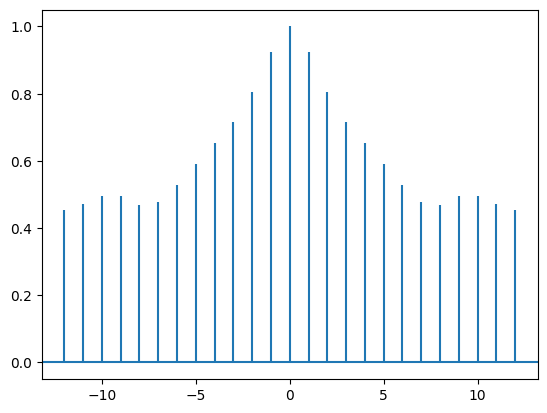

In [58]:
new_df = pd.to_numeric(bikes1['demand'], downcast='float')
plt.acorr(new_df, maxlags = 12)

<AxesSubplot: >

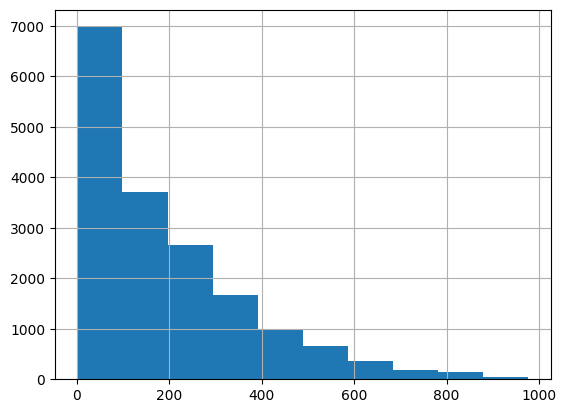

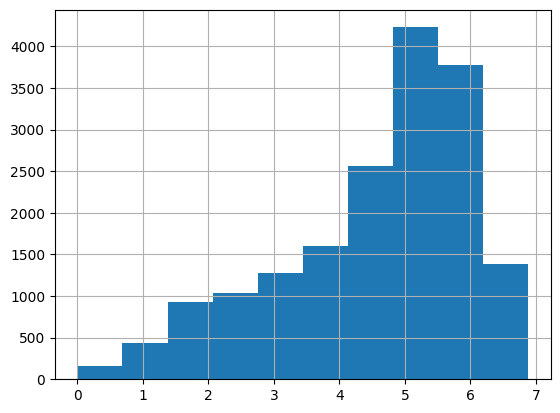

In [60]:
df1 = bikes1['demand']
#transform data from left skewed data to normal dist
df2 = np.log(df1)
plt.figure()
df1.hist()

plt.figure()
df2.hist()

In [61]:
bikes1['demand'] = np.log(bikes1['demand'])

In [62]:
x = bikes1['demand'].shift(+1).to_frame()
x.columns = ['x_1']

x2 = bikes1['demand'].shift(+2).to_frame()
x2.columns = ['x_2']

x3 = bikes1['demand'].shift(+3).to_frame()
x3.columns = ['x_3']

bikes_lags = pd.concat([bikes1, x, x2, x3], axis = 1)

In [64]:
bikes_lags.head()

,season,month,hour,holiday,weather,temp,humidity,demand,x_1,x_2,x_3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [65]:
bikes_lags = bikes_lags.dropna()

In [66]:
bikes_lags.head()

,season,month,hour,holiday,weather,temp,humidity,demand,x_1,x_2,x_3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [68]:
bikes_lags['season'] = bikes_lags['season'].astype('category')
bikes_lags['holiday'] = bikes_lags['holiday'].astype('category')
bikes_lags['weather'] = bikes_lags['weather'].astype('category')
bikes_lags['month'] = bikes_lags['season'].astype('category')
bikes_lags['hour'] = bikes_lags['hour'].astype('category')

bikes_lags = pd.get_dummies(bikes_lags, drop_first = True)

In [69]:
bikes_lags.dtypes

temp         float64
humidity     float64
demand       float64
x_1          float64
x_2          float64
x_3          float64
season_2       uint8
season_3       uint8
season_4       uint8
month_2        uint8
month_3        uint8
month_4        uint8
hour_1         uint8
hour_2         uint8
hour_3         uint8
hour_4         uint8
hour_5         uint8
hour_6         uint8
hour_7         uint8
hour_8         uint8
hour_9         uint8
hour_10        uint8
hour_11        uint8
hour_12        uint8
hour_13        uint8
hour_14        uint8
hour_15        uint8
hour_16        uint8
hour_17        uint8
hour_18        uint8
hour_19        uint8
hour_20        uint8
hour_21        uint8
hour_22        uint8
hour_23        uint8
holiday_1      uint8
weather_2      uint8
weather_3      uint8
weather_4      uint8
dtype: object

# Train test 

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
y = bikes_lags[['demand']]
X = bikes_lags.drop(['demand'],axis = 1)

In [72]:
train_size = 0.7 * len(X)

In [73]:
train_size = int(train_size)

In [76]:
x_train = X.values[0:train_size]
x_test = X.values[train_size:len(X)]

y_train = y.values[0:train_size]
y_test = y.values[train_size:len(y)]

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
std_reg = LinearRegression()

In [82]:
std_reg.fit(x_train, y_train)

LinearRegression()

In [83]:
r2_score = std_reg.score(x_train, y_train)
r2_test = std_reg.score(x_test, y_test)

In [84]:
Y_predict = std_reg.predict(x_test)

In [85]:
Y_predict

array([[3.17873324],
       [2.8361171 ],
       [3.18718473],
       ...,
       [4.35645402],
       [4.27923496],
       [3.72429332]])

In [87]:
r2_test

0.9300588270460216

In [88]:
r2_score

0.9191306115056908

In [90]:
from sklearn.metrics import mean_squared_error